# <font color='#00008B'>  <center> Machine and Deep Learning Solutions for Bank Direct Marketing Campaigns </center> </font>

### Importing Libraries & Data Uploading

In [1]:
import warnings
warnings.filterwarnings("ignore") #To filter the future warnings. 

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import MinMaxScaler
# Library to split data
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import KFold

In [2]:
# Get Final Dataset for Prediction
df = pd.read_csv(r"datasets/processed_data_final.csv")
df.head()

,age,education,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_single,marital_unknown,housing_yes,default_no,default_yes,loan_unknown,loan_yes,month_apr,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_wed,poutcome_failure,poutcome_success,y
0,0.750000,0.285714,0.405280,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,0.769231,0.714286,0.231366,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,0.384615,0.714286,0.350932,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3,0.442308,0.428571,0.234472,0.0,0.0,0,0.698753,0.685714,0.859735,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,0.750000,0.714286,0.476708,0.0,0.0,0,0.698753,0.685714,0.859735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [3]:
df.shape

(35165, 45)

### 4.5 Dataset Balancing using Synthetic Minority Oversampling (SMOTE) Technique 

In [4]:
X_raw = df.drop(['y'], axis=1)
X_raw.shape

(35165, 44)

In [5]:
y_raw = df['y']
y_raw.shape

(35165,)

In [6]:
y_raw.value_counts()

0    32435
1     2730
Name: y, dtype: int64

In [7]:
# Synthetic Minority Oversampling (SMOTE) technique was used in this study to obtain a balanced dataset. This is due to its simplicity and effectiveness [Ref 1].
# Ref 1: Chaurasia, Priyanka, et al. "Modelling assistive technology adoption for people with dementia." Journal of biomedical informatics 63 (2016): 235-248.

over = SMOTE(sampling_strategy=0.4, random_state=100)
under = RandomUnderSampler(sampling_strategy=1, random_state=100)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X_raw, y_raw)

In [8]:
X.shape

(25948, 44)

In [9]:
y.value_counts()

0    12974
1    12974
Name: y, dtype: int64

## <font color='#00008B'> 5. Building and Tunning the Classifiers

In [10]:
# Helper functions
def get_scores(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall = metrics.recall_score(y_test, y_pred, average='macro') 
    return auc, accuracy, f1_score, precision, recall

acc_table= {}

df_acc_kfold = pd.DataFrame()
df_accuracy_kfold = pd.DataFrame()
df_f1_score_kfold = pd.DataFrame()
df_precision_kfold = pd.DataFrame()
df_recall_kfold = pd.DataFrame()

### 5.1 Conventional Methods
#### 5.1.1 Model 1-1 : Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_1_1 = LogisticRegression(random_state=1)

cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# enumerate splits
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []

k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # defining the model
    model = LogisticRegression(random_state=1) # 1 Model
    model.fit(X_train,y_train)
    # evaluating the model on the hold out dataset
    yhat = model.predict(X_test)
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
df_acc_kfold["Conv-Logistic"] = result_acc
df_accuracy_kfold["Conv-Logistic"] = result_accuracy
df_f1_score_kfold["Conv-Logistic"] = result_f1_score
df_precision_kfold["Conv-Logistic"] = result_precision
df_recall_kfold["Conv-Logistic"] = result_recall

# summarize the estimated performance of the model
print("\n***  Conventional - Logistic Regression  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))


K =  1 , AUC =  0.8924461705150808 , Accuracy =  0.892485549132948 , F1 score =  0.8924691976133674 , precision =  0.8925879576149118 , Recall =  0.8924461705150808
K =  2 , AUC =  0.897525414660246 , Accuracy =  0.8971098265895954 , F1 score =  0.8970960735171261 , precision =  0.8972066292435177 , Recall =  0.897525414660246
K =  3 , AUC =  0.896094904646267 , Accuracy =  0.8959537572254336 , F1 score =  0.8959369285553881 , precision =  0.8964990783136112 , Recall =  0.896094904646267
K =  4 , AUC =  0.8971138208001634 , Accuracy =  0.8971098265895954 , F1 score =  0.8970994968477054 , precision =  0.8972794811516969 , Recall =  0.8971138208001634
K =  5 , AUC =  0.8955768497409573 , Accuracy =  0.8955684007707129 , F1 score =  0.8955197448657971 , precision =  0.8963283053048419 , Recall =  0.8955768497409573
K =  6 , AUC =  0.8951203039407515 , Accuracy =  0.8951830443159923 , F1 score =  0.8951359381964047 , precision =  0.8957149978940555 , Recall =  0.8951203039407515
K =  7 , 

#### 5.1.2 Model 1-2 : Decision Tree

In [50]:
# Decision Tree Libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Nested Cross-Validation was used in this study to both tune and evaluate the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []


k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    dtree_estimator = DecisionTreeClassifier(random_state=1) 
    # Grid of parameters to choose from
    parameters = {"ccp_alpha": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5], 
               'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8]}
        
    acc_scorer = metrics.make_scorer(metrics.roc_auc_score)
    # Running the grid search
    grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer, cv=cv_inner, refit=True)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the clf to the best combination of parameters
    model_1_2 = grid_obj.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_1_2.predict(X_test)
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
      
df_acc_kfold["Conv-DecisionTree"] = result_acc
df_accuracy_kfold["Conv-DecisionTree"] = result_accuracy
df_f1_score_kfold["Conv-DecisionTree"] = result_f1_score
df_precision_kfold["Conv-DecisionTree"] = result_precision
df_recall_kfold["Conv-DecisionTree"] = result_recall

# summarize the estimated performance of the model
print("\n***  Conventional - Decision Tree  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))


K =  1 , AUC =  0.8861606188192916 , Accuracy =  0.8863198458574181 , F1 score =  0.8861704853201895 , precision =  0.887915087865859 , Recall =  0.8861606188192916
K =  2 , AUC =  0.8856607811663991 , Accuracy =  0.8840077071290944 , F1 score =  0.8838917717521484 , precision =  0.8886352117688079 , Recall =  0.8856607811663991
K =  3 , AUC =  0.8862613281565578 , Accuracy =  0.8859344894026975 , F1 score =  0.8857682313974072 , precision =  0.8889605044821725 , Recall =  0.8862613281565579
K =  4 , AUC =  0.8863282934542557 , Accuracy =  0.8863198458574181 , F1 score =  0.8862668809424729 , precision =  0.8870621800449201 , Recall =  0.8863282934542556
K =  5 , AUC =  0.8898067485354968 , Accuracy =  0.8897880539499037 , F1 score =  0.88953173374613 , precision =  0.8934880162325904 , Recall =  0.8898067485354968
K =  6 , AUC =  0.8627152230550179 , Accuracy =  0.8628131021194605 , F1 score =  0.8626793097666521 , precision =  0.8639761238014514 , Recall =  0.8627152230550179
K =  7 

### 5.2 Ensemble Methods
#### 5.2.1 Model 2-1 : Randome Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Nested Cross-Validation was used in this study to both tune and evaluate the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []

k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    rf_estimator_weighted = RandomForestClassifier(random_state=1)
#     Grid of parameters to choose from 
    parameters= {"n_estimators": [100, 250, 500, 750, 1000], "max_samples": [0.1, 0.25, 0.5, 1]}
    
    # Type of scoring used to compare parameter combinations
    acc_scorer = metrics.make_scorer(metrics.roc_auc_score)
    # # Run the grid search
    grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer, cv=cv_inner, refit=True)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the clf to the best combination of parameters
    model_2_1 = grid_obj.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_2_1.predict(X_test)
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
df_acc_kfold["Ensemble-RandomForest"] = result_acc
df_accuracy_kfold["Ensemble-RandomForest"] = result_accuracy
df_f1_score_kfold["Ensemble-RandomForest"] = result_f1_score
df_precision_kfold["Ensemble-RandomForest"] = result_precision
df_recall_kfold["Ensemble-RandomForest"] = result_recall

# summarize the estimated performance of the model
print("\n***  Ensemble - RandomForest  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))

K =  1 , AUC =  0.9424897116897064 , Accuracy =  0.9425818882466281 , F1 score =  0.9425511761887251 , precision =  0.9432321776652284 , Recall =  0.9424897116897064
K =  2 , AUC =  0.9385634028892457 , Accuracy =  0.9379576107899807 , F1 score =  0.9379552521032426 , precision =  0.9383174177264528 , Recall =  0.9385634028892456
K =  3 , AUC =  0.9419632461613767 , Accuracy =  0.941811175337187 , F1 score =  0.9417999744234471 , precision =  0.942483686563152 , Recall =  0.9419632461613767
K =  4 , AUC =  0.9410480271528583 , Accuracy =  0.9410404624277456 , F1 score =  0.9410185656296307 , precision =  0.941717094320137 , Recall =  0.9410480271528584
K =  5 , AUC =  0.937967551051199 , Accuracy =  0.9379576107899807 , F1 score =  0.9379174518092941 , precision =  0.9391209731020008 , Recall =  0.9379675510511991
K =  6 , AUC =  0.9432570273824672 , Accuracy =  0.9433526011560693 , F1 score =  0.9432987123985063 , precision =  0.9447576179844392 , Recall =  0.9432570273824671
K =  7 ,

#### 5.2.2 Model 2-2 : XGBoost

In [53]:
## XGBoost libary for building XGBoost Classifier
from xgboost import XGBClassifier

# Nested Cross-Validation was used in this study to both tune and evalute the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []


k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    model = XGBClassifier(random_state=1)
    # Grid of parameters to choose from        
    parameters = {
                 "n_estimators": [50, 100, 150],
                 "max_depth":[1, 2, 3],
                 "learning_rate":[0.3, 0.4],
                 "colsample_bytree":[0.5, 0.75, 1],
                 "subsample":[0.6, 0.8]
     }
    
    # Type of scoring used to compare parameter combinations
    acc_scorer = metrics.make_scorer(metrics.roc_auc_score)
    # # Run the grid search
    grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer, cv=cv_inner, refit=True)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the clf to the best combination of parameters
    model_2_2 = grid_obj.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_2_2.predict(X_test)
    
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
df_acc_kfold["Ensemble-XGB"] = result_acc
df_accuracy_kfold["Ensemble-XGB"] = result_accuracy
df_f1_score_kfold["Ensemble-XGB"] = result_f1_score
df_precision_kfold["Ensemble-XGB"] = result_precision
df_recall_kfold["Ensemble-XGB"] = result_recall

# summarize the estimated performance of the model
print("\n***  Ensemble - XGBClassifier  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))


K =  1 , AUC =  0.9441315644409385 , Accuracy =  0.9441233140655106 , F1 score =  0.9441227830098808 , precision =  0.9441210118894876 , Recall =  0.9441315644409385
K =  2 , AUC =  0.941729088639201 , Accuracy =  0.941811175337187 , F1 score =  0.9417585558494046 , precision =  0.9417905469282333 , Recall =  0.941729088639201
K =  3 , AUC =  0.9417939475447542 , Accuracy =  0.941811175337187 , F1 score =  0.941806197685614 , precision =  0.9418254424652586 , Recall =  0.9417939475447542
K =  4 , AUC =  0.9398837901379621 , Accuracy =  0.9398843930635838 , F1 score =  0.9398841698841698 , precision =  0.9398890160060731 , Recall =  0.9398837901379621
K =  5 , AUC =  0.9364181060239761 , Accuracy =  0.9364161849710982 , F1 score =  0.93641482526941 , precision =  0.9364585499153474 , Recall =  0.9364181060239762
K =  6 , AUC =  0.9417743895702132 , Accuracy =  0.941811175337187 , F1 score =  0.9417999744234469 , precision =  0.9420296056971889 , Recall =  0.9417743895702132
K =  7 , AUC

### 5.3 Multilayer Perceptron Neural Networks - MLP

#### 5.3.1 Model 3-1 : MLP with one hidden layer - MLP1

In [68]:
# Use scikit-learn to grid search the batch size and epochs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
# import BatchNormalization
from tensorflow.keras.layers import BatchNormalization


def create_model_one_hidden_layer(units, dropout_rate, L2, batch_normalization = "yes"):
    # create model
    model = Sequential()
    model.add(Dense(units = units, kernel_regularizer=l2(l=L2), input_shape=(X_train.shape[1],))) 
    if batch_normalization == "yes":
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1)) # an output layer with one node to predict
   
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # Compile model
    return model

In [69]:
# Nested Cross-Validation was used in this study to both tune and evalute the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []

k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    model = KerasClassifier(model=create_model_one_hidden_layer, epochs=10, batch_size=64, verbose=0)
    # Grid of parameters to choose from
    units = [5, 10, 15, 20]
    dropout_rate = [0, 0.25, 0.5]
    L2 = [0.1, 0.001, 0]
    batch_normalization = ["yes"]
    learning_rate = [0.01, 0.001, 0.0001]
    
    param_grid = dict(model__units=units, model__dropout_rate = dropout_rate,
                      model__batch_normalization = batch_normalization, optimizer__learning_rate=learning_rate, 
                      model__L2 = L2)
    # Running the grid search
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_inner, refit=True)
    grid_result = grid.fit(X_train, y_train)
    model_3_1 = grid_result.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_3_1.predict(X_test)   
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
df_acc_kfold["MLP - MLP1"] = result_acc
df_accuracy_kfold["MLP - MLP1"] = result_accuracy
df_f1_score_kfold["MLP - MLP1"] = result_f1_score
df_precision_kfold["MLP - MLP1"] = result_precision
df_recall_kfold["MLP - MLP1"] = result_recall

# summarize the estimated performance of the model
print("\n***  MLP with one hidden layer - MLP1  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))

K =  1 , AUC =  0.8943479040834851 , Accuracy =  0.8944123314065511 , F1 score =  0.8943805704099822 , precision =  0.8946855098381474 , Recall =  0.894347904083485
K =  2 , AUC =  0.8942170501159263 , Accuracy =  0.8940269749518305 , F1 score =  0.8939876179617545 , precision =  0.8939243175810141 , Recall =  0.8942170501159266
K =  3 , AUC =  0.8887078416743097 , Accuracy =  0.8886319845857418 , F1 score =  0.8886303307506395 , precision =  0.8887748154327126 , Recall =  0.8887078416743098
K =  4 , AUC =  0.8998105738856886 , Accuracy =  0.8998073217726397 , F1 score =  0.8998007598925031 , precision =  0.8999203229386754 , Recall =  0.8998105738856885
K =  5 , AUC =  0.8986653448220557 , Accuracy =  0.8986512524084779 , F1 score =  0.8985180936922366 , precision =  0.900791304784017 , Recall =  0.8986653448220558
K =  6 , AUC =  0.8893412241028438 , Accuracy =  0.8894026974951831 , F1 score =  0.8893547853704344 , precision =  0.8899040246131004 , Recall =  0.8893412241028438
K =  7

#### 5.3.2 Model 3-2 : MLP with Three hidden layers - MLP3

In [17]:
def create_model_three_hidden_layers(units_1, units_2, units_3, dropout_rate, L2, batch_normalization = "yes"):
    # create model
    model = Sequential()
    model.add(Dense(units = units_1, kernel_regularizer=l2(l=L2), input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())
    
    model.add(Dense(units = units_2, kernel_regularizer=l2(l=L2)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())
        
    model.add(Dense(units = units_3, kernel_regularizer=l2(l=L2)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())

    model.add(Dense(1))
    # Compile model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# Nested Cross-Validation was used in this study to both tune and evalute the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []

k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    model = KerasClassifier(model=create_model_three_hidden_layers, epochs=10, batch_size=64, verbose=0)
    # Grid of parameters to choose from 
    units = [5, 10, 15, 20]
    dropout_rate = [0, 0.25, 0.5]
    L2 = [0.1, 0.01, 0.001, 0]
    batch_normalization = ["yes"]
    learning_rate = [0.01, 0.001, 0.0001]

    param_grid = dict(model__units_1 = units, model__units_2 = units, model__units_3 = units,
                  model__dropout_rate = dropout_rate,
                 model__batch_normalization = batch_normalization, 
                 optimizer__learning_rate=learning_rate, 
                 model__L2 = L2)
    # Running the grid search
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_inner, refit=True)
    grid_result = grid.fit(X_train, y_train)
    model_3_2 = grid_result.best_estimator_
    # evaluating the model on the hold out dataset
    yhat =  model_3_2.predict(X_test)
    
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1

df_acc_kfold["MLP - MLP3"] = result_acc
df_accuracy_kfold["MLP - MLP3"] = result_accuracy
df_f1_score_kfold["MLP - MLP3"] = result_f1_score
df_precision_kfold["MLP - MLP3"] = result_precision
df_recall_kfold["MLP - MLP3"] = result_recall

# summarize the estimated performance of the model
print("\n***  MLP with Three hidden layers - MLP3  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))


K =  1 , AUC =  0.8847774588586391 , Accuracy =  0.8847784200385357 , F1 score =  0.8847759560942642 , precision =  0.8847747161230692 , Recall =  0.884777458858639
K =  2 , AUC =  0.887912430889959 , Accuracy =  0.8878612716763006 , F1 score =  0.8877972226898503 , precision =  0.8877266466457425 , Recall =  0.887912430889959
K =  3 , AUC =  0.8831884097573031 , Accuracy =  0.8832369942196532 , F1 score =  0.8832169465943864 , precision =  0.8833045339430723 , Recall =  0.8831884097573031
K =  4 , AUC =  0.8924847906689968 , Accuracy =  0.892485549132948 , F1 score =  0.8924849743591801 , precision =  0.8924917848546697 , Recall =  0.8924847906689968
K =  5 , AUC =  0.8909510866014139 , Accuracy =  0.8909441233140655 , F1 score =  0.8909098444438273 , precision =  0.8914538012447185 , Recall =  0.890951086601414
K =  6 , AUC =  0.8942186035405105 , Accuracy =  0.8944123314065511 , F1 score =  0.894044004306013 , precision =  0.8994462079600157 , Recall =  0.8942186035405106
K =  7 , A

#### 5.3.3  Model 3-3 : MLP with Five hidden layers - MLP5

In [20]:
def create_model_five_hidden_layers(units_1,units_2,units_3,units_4, units_5, dropout_rate, L2, batch_normalization = "yes"):
    # create model
    model = Sequential()
    model.add(Dense(units = units_1, kernel_regularizer=l2(l=L2), input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())
        
    model.add(Dense(units = units_2, kernel_regularizer=l2(l=L2)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())
        
    model.add(Dense(units = units_3, kernel_regularizer=l2(l=L2)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())    
    
    model.add(Dense(units = units_4, kernel_regularizer=l2(l=L2)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())
        
    model.add(Dense(units = units_5, kernel_regularizer=l2(l=L2)))
    model.add(Dropout(dropout_rate))
    if batch_normalization == "yes":
        model.add(BatchNormalization())

    model.add(Dense(1))
    # Compile model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [21]:
# Nested Cross-Validation was used in this study to both tune and evalute the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []

k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    model = KerasClassifier(model=create_model_five_hidden_layers, epochs=10, batch_size=64, verbose=0)
    # Grid of parameters to choose from
    units = [5, 10, 15, 20]
    dropout_rate = [0, 0.25, 0.5]
    L2 = [0.1, 0.01, 0.001, 0]
    batch_normalization = ["yes"]
    learning_rate = [0.01, 0.001, 0.0001]
    
    param_grid = dict(model__units_1=units, model__units_2=units, model__units_3=units, model__units_4=units, model__units_5=units,
                  model__dropout_rate = dropout_rate,
                 model__batch_normalization = batch_normalization, 
                 optimizer__learning_rate=learning_rate, 
                 model__L2 = L2)
    # Running the grid search
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_inner, refit=True)
    grid_result = grid.fit(X_train, y_train)
    model_3_3 = grid_result.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_3_3.predict(X_test)
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
df_acc_kfold["MLP - MLP5"] = result_acc
df_accuracy_kfold["MLP - MLP5"] = result_accuracy
df_f1_score_kfold["MLP - MLP5"] = result_f1_score
df_precision_kfold["MLP - MLP5"] = result_precision
df_recall_kfold["MLP - MLP5"] = result_recall

# summarize the estimated performance of the model
print("\n***  MLP with Five hidden layers - MLP5  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))


K =  1 , AUC =  0.39000774593338494 , Accuracy =  0.3880539499036609 , F1 score =  0.27956690727373684 , precision =  0.21787105149286023 , Recall =  0.390007745933385
K =  2 , AUC =  0.8739967897271269 , Accuracy =  0.8747591522157996 , F1 score =  0.8744243098157569 , precision =  0.8757629044184844 , Recall =  0.8739967897271268
K =  3 , AUC =  0.854691888398352 , Accuracy =  0.8551059730250482 , F1 score =  0.8545320312201825 , precision =  0.8597073154275084 , Recall =  0.8546918883983519
K =  4 , AUC =  0.8878605125256459 , Accuracy =  0.8878612716763006 , F1 score =  0.8878606721810802 , precision =  0.8878674243054252 , Recall =  0.8878605125256458
K =  5 , AUC =  0.8377297140610132 , Accuracy =  0.8377649325626204 , F1 score =  0.8363886979041633 , precision =  0.849437649806404 , Recall =  0.8377297140610132
K =  6 , AUC =  0.8675427060278493 , Accuracy =  0.8674373795761079 , F1 score =  0.8673380706507847 , precision =  0.8687869753714077 , Recall =  0.8675427060278493
K = 

### 5.4 Deep Learning - LSTM & CNN
#### 5.4.1 Model 4-1 : LSTM

In [27]:
from keras.layers import Conv2D, Flatten, LSTM, Activation, Input, Conv1D, MaxPooling1D
from keras.models import Model

def create_one_lstm_layer(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences=False, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',  metrics=['accuracy'])
    return model

In [28]:
# Nested Cross-Validation was used in this study to both tune and evalute the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []

k=1
for train_ix, test_ix in cv_outer.split(X):
    # splitting the data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configuring the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    model = KerasClassifier(model=create_one_lstm_layer, epochs=10, batch_size=64, verbose=0)
    # Grid of parameters to choose from
    units = [10, 20, 50]
    dropout_rate = [0.25, 0.5]
    
    param_grid = dict(model__units=units, model__dropout_rate = dropout_rate)
        
    # Running the grid search
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_inner, refit=True)
    grid_result = grid.fit(X_train, y_train)
    model_4_1 = grid_result.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_4_1.predict(X_test)
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
df_acc_kfold["DL - LSTM1"] = result_acc
df_accuracy_kfold["DL - LSTM1"] = result_accuracy
df_f1_score_kfold["DL - LSTM1"] = result_f1_score
df_precision_kfold["DL - LSTM1"] = result_precision
df_recall_kfold["DL - LSTM1"] = result_recall

# summarize the estimated performance of the model
print("\n***  DL with one LSTM layer - LSTM1  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))

K =  1 , AUC =  0.792537886168044 , Accuracy =  0.7926782273603082 , F1 score =  0.7924659171451269 , precision =  0.7935509944243568 , Recall =  0.792537886168044
K =  2 , AUC =  0.7906500802568217 , Accuracy =  0.7872832369942196 , F1 score =  0.7854014756008112 , precision =  0.8046451764864229 , Recall =  0.7906500802568218
K =  3 , AUC =  0.7966732524818583 , Accuracy =  0.7965317919075144 , F1 score =  0.7964947718631179 , precision =  0.7970067070030437 , Recall =  0.7966732524818583
K =  4 , AUC =  0.8235099845203996 , Accuracy =  0.8235067437379576 , F1 score =  0.8234951847337169 , precision =  0.8235987888611349 , Recall =  0.8235099845203997
K =  5 , AUC =  0.8100380990623139 , Accuracy =  0.810019267822736 , F1 score =  0.8095703146804276 , precision =  0.8130133420969305 , Recall =  0.8100380990623139
K =  6 , AUC =  0.8078522779518214 , Accuracy =  0.8080924855491329 , F1 score =  0.8070907303954467 , precision =  0.814061931887044 , Recall =  0.8078522779518214
K =  7 ,

#### 5.4.2 Model 4-2 : CNN + LSTM

In [31]:
def create_one_conv_2_lstm_layers(filters):
    inputs = Input(shape = (X_train.shape[1],1,))
    x = Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
    x = MaxPooling1D(pool_size = 2, padding = 'same')(x)
    x = LSTM(128, return_sequences = True)(x)
    x = LSTM(128)(x)
    outputs = Dense(1,activation ='sigmoid')(x)
    model = Model(inputs = inputs,outputs = outputs)
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [32]:
# Nested Cross-Validation was used in this study to both tune and evalute the model
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
result_acc = []
result_accuracy = []
result_f1_score = []
result_precision = []
result_recall = []


k=1
for train_ix, test_ix in cv_outer.split(X):
    # configuring the cross-validation procedure
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # defining the model
    model = KerasClassifier(model=create_one_conv_2_lstm_layers, epochs=10, batch_size=64, verbose=0)
    # Grid of parameters to choose from
    filters = [10, 20, 50]
    param_grid = dict(model__filters=filters)
    # Running the grid search
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_inner, refit=True)
    grid_result = grid.fit(X_train, y_train)
    model_4_2 = grid_result.best_estimator_
    # evaluating the model on the hold out dataset
    yhat = model_4_2.predict(X_test)
    # evaluating the model
    acc, accuracy, f1_score, precision, recall = get_scores(y_test, yhat)

    # storing the result
    result_acc.append(acc)
    result_accuracy.append(accuracy)
    result_f1_score.append(f1_score)
    result_precision.append(precision)
    result_recall.append(recall)
    
    print("K = ", k, ", AUC = ", acc, ", Accuracy = ", accuracy,", F1 score = ", f1_score,
          ", precision = ", precision,", Recall = ", recall)
    k+=1
    
    
df_acc_kfold["DL - CNN1&LSTM2"] = result_acc
df_accuracy_kfold["DL - CNN1&LSTM2"] = result_accuracy
df_f1_score_kfold["DL - CNN1&LSTM2"] = result_f1_score
df_precision_kfold["DL - CNN1&LSTM2"] = result_precision
df_recall_kfold["DL - CNN1&LSTM2"] = result_recall

# summarize the estimated performance of the model
print("\n***  DL with one CNN and 2 LSTM layers - CNN1&LSTM2  ***\n")
print('AUC : %.3f (%.3f)' % (np.mean(result_acc), np.std(result_acc)))
print('Accuracy : %.3f (%.3f)' % (np.mean(result_accuracy), np.std(result_accuracy)))
print('F1 score : %.3f (%.3f)' % (np.mean(result_f1_score), np.std(result_f1_score)))
print('Precision : %.3f (%.3f)' % (np.mean(result_precision), np.std(result_precision)))
print('Recall : %.3f (%.3f)' % (np.mean(result_recall), np.std(result_recall)))


K =  1 , AUC =  0.8624660224394463 , Accuracy =  0.8628131021194605 , F1 score =  0.8620658557823585 , precision =  0.8699369977920127 , Recall =  0.8624660224394463
K =  2 , AUC =  0.8878098805065098 , Accuracy =  0.8870905587668594 , F1 score =  0.8870904916987934 , precision =  0.88777622297809 , Recall =  0.8878098805065098
K =  3 , AUC =  0.8729452494214146 , Accuracy =  0.8724470134874759 , F1 score =  0.8719602589281389 , precision =  0.8793999912979158 , Recall =  0.8729452494214146
K =  4 , AUC =  0.8755445481037787 , Accuracy =  0.8755298651252409 , F1 score =  0.8753520935110993 , precision =  0.8777213461074296 , Recall =  0.8755445481037787
K =  5 , AUC =  0.8790209241903504 , Accuracy =  0.8789980732177264 , F1 score =  0.8785759757375478 , precision =  0.8844009195490932 , Recall =  0.8790209241903504
K =  6 , AUC =  0.8784121162872753 , Accuracy =  0.8786127167630058 , F1 score =  0.8781610422084403 , precision =  0.883778910613852 , Recall =  0.8784121162872753
K =  7 

## <font color='#00008B'> 6. Model comparison using statistical analysis

In [209]:
# Helper
def ranking_model(results_aggregate):
    ranking = pd.DataFrame(columns=results_aggregate.columns)
    for i in range(results_aggregate.shape[0]):
        ranking.loc[i, results_aggregate.iloc[i].rank(ascending=False).index]=results_aggregate.iloc[i].rank(ascending=False)
    return ranking

### 6.1 Evaluating the Performance using AUC Measure

In [239]:
df_acc_kfold

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,0.892446,0.886161,0.942490,0.944132,0.894348,0.884777,0.390008,0.792538,0.862466
1,0.897525,0.885661,0.938563,0.941729,0.894217,0.887912,0.873997,0.790650,0.887810
2,0.896095,0.886261,0.941963,0.941794,0.888708,0.883188,0.854692,0.796673,0.872945
3,0.897114,0.886328,0.941048,0.939884,0.899811,0.892485,0.887861,0.823510,0.875545
4,0.895577,0.889807,0.937968,0.936418,0.898665,0.890951,0.837730,0.810038,0.879021
5,0.895120,0.862715,0.943257,0.941774,0.889341,0.894219,0.867543,0.807852,0.878412
6,0.902179,0.845944,0.946523,0.939569,0.901872,0.892455,0.899505,0.780164,0.880633
7,0.893856,0.881813,0.942933,0.941417,0.891034,0.887877,0.881291,0.774675,0.865146
8,0.892905,0.879869,0.939156,0.942190,0.898307,0.889363,0.887038,0.821542,0.879771
9,0.900320,0.884351,0.942428,0.936512,0.897316,0.883345,0.892819,0.804319,0.886537


In [240]:
df_rank_acc = ranking_model(df_acc_kfold)
df_rank_acc

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,4.0,5.0,2.0,1.0,3.0,6.0,9.0,8.0,7.0
1,3.0,7.0,2.0,1.0,4.0,5.0,8.0,9.0,6.0
2,3.0,5.0,1.0,2.0,4.0,6.0,8.0,9.0,7.0
3,4.0,7.0,1.0,2.0,3.0,5.0,6.0,9.0,8.0
4,4.0,6.0,1.0,2.0,3.0,5.0,8.0,9.0,7.0
5,3.0,8.0,1.0,2.0,5.0,4.0,7.0,9.0,6.0
6,3.0,8.0,1.0,2.0,4.0,6.0,5.0,9.0,7.0
7,3.0,6.0,1.0,2.0,4.0,5.0,7.0,9.0,8.0
8,4.0,7.0,2.0,1.0,3.0,5.0,6.0,9.0,8.0
9,3.0,7.0,1.0,2.0,4.0,8.0,5.0,9.0,6.0


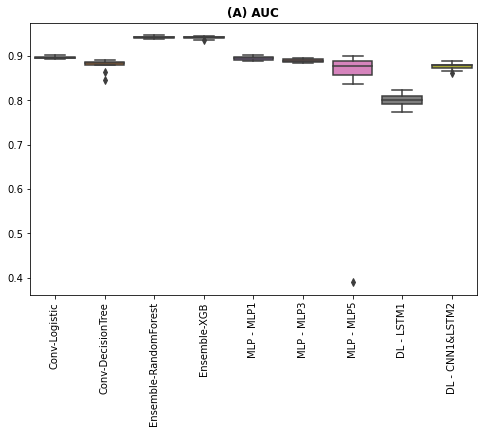

In [241]:
plt.figure(figsize=(8, 5))
plt.title("(A) AUC", fontweight='bold')
sns.boxplot(data=df_acc_kfold)
plt.xticks(rotation=90)
plt.show()

In [242]:
df_acc_kfold.mean(axis=0)

Conv-Logistic            0.896314
Conv-DecisionTree        0.878891
Ensemble-RandomForest    0.941633
Ensemble-XGB             0.940542
MLP - MLP1               0.895362
MLP - MLP3               0.888657
MLP - MLP5               0.827248
DL - LSTM1               0.800196
DL - CNN1&LSTM2          0.876829
dtype: float64

In [243]:
from scipy import stats
import scikit_posthocs as sp

stats.friedmanchisquare(df_acc_kfold['Conv-Logistic'], df_acc_kfold['Ensemble-RandomForest'], df_acc_kfold['Ensemble-XGB'])

FriedmanchisquareResult(statistic=15.800000000000011, pvalue=0.0003707435404590862)

##### Conclusion:
* Random Forests and XGBoost models are the best models with AUC values of 0.941633 and 0.940542, respectively.

### 6.2 Evaluating the Performance using Accuracy Measure

In [244]:
df_accuracy_kfold

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,0.892486,0.886320,0.942582,0.944123,0.894412,0.884778,0.388054,0.792678,0.862813
1,0.897110,0.884008,0.937958,0.941811,0.894027,0.887861,0.874759,0.787283,0.887091
2,0.895954,0.885934,0.941811,0.941811,0.888632,0.883237,0.855106,0.796532,0.872447
3,0.897110,0.886320,0.941040,0.939884,0.899807,0.892486,0.887861,0.823507,0.875530
4,0.895568,0.889788,0.937958,0.936416,0.898651,0.890944,0.837765,0.810019,0.878998
5,0.895183,0.862813,0.943353,0.941811,0.889403,0.894412,0.867437,0.808092,0.878613
6,0.902505,0.847784,0.947206,0.939499,0.902505,0.892100,0.899422,0.784971,0.880154
7,0.894412,0.883237,0.943738,0.941811,0.891715,0.889017,0.882081,0.771098,0.867052
8,0.892830,0.879722,0.939090,0.942174,0.898227,0.889360,0.887047,0.821511,0.879722
9,0.899769,0.883192,0.941789,0.936392,0.897070,0.883577,0.891673,0.801850,0.885505


In [245]:
df_accuracy = ranking_model(df_accuracy_kfold)
df_accuracy

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,4.0,5.0,2.0,1.0,3.0,6.0,9.0,8.0,7.0
1,3.0,7.0,2.0,1.0,4.0,5.0,8.0,9.0,6.0
2,3.0,5.0,1.5,1.5,4.0,6.0,8.0,9.0,7.0
3,4.0,7.0,1.0,2.0,3.0,5.0,6.0,9.0,8.0
4,4.0,6.0,1.0,2.0,3.0,5.0,8.0,9.0,7.0
5,3.0,8.0,1.0,2.0,5.0,4.0,7.0,9.0,6.0
6,3.5,8.0,1.0,2.0,3.5,6.0,5.0,9.0,7.0
7,3.0,6.0,1.0,2.0,4.0,5.0,7.0,9.0,8.0
8,4.0,7.5,2.0,1.0,3.0,5.0,6.0,9.0,7.5
9,3.0,8.0,1.0,2.0,4.0,7.0,5.0,9.0,6.0


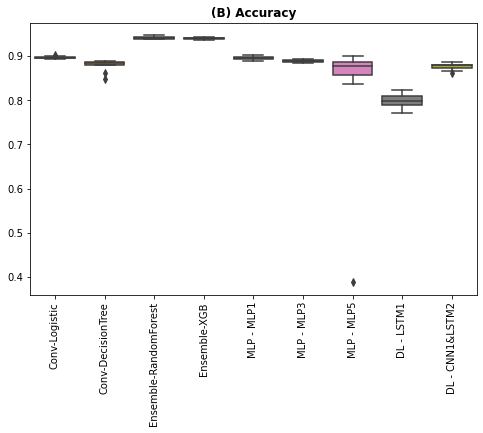

In [246]:
plt.figure(figsize=(8, 5))
plt.title("(B) Accuracy", fontweight='bold')
sns.boxplot(data=df_accuracy_kfold)
plt.xticks(rotation=90)
plt.show()

In [247]:
df_accuracy_kfold.mean(axis=0)

Conv-Logistic            0.896293
Conv-DecisionTree        0.878912
Ensemble-RandomForest    0.941652
Ensemble-XGB             0.940573
MLP - MLP1               0.895445
MLP - MLP3               0.888777
MLP - MLP5               0.827121
DL - LSTM1               0.799754
DL - CNN1&LSTM2          0.876792
dtype: float64

In [248]:
stats.friedmanchisquare(df_accuracy_kfold['Conv-Logistic'], df_accuracy_kfold['Ensemble-RandomForest'], 
                        df_accuracy_kfold['Ensemble-XGB'])

FriedmanchisquareResult(statistic=15.846153846153864, pvalue=0.00036228588397514325)

##### Conclusion:
* Random Forests and XGBoost models are the best models with Accuracy values of 0.941652 and 0.940573, respectively.

### 6.3 Evaluating the Performance using F1-Score Measure

In [256]:
df_f1_score_kfold

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,0.892469,0.886170,0.942551,0.944123,0.894381,0.884776,0.279567,0.792466,0.862066
1,0.897096,0.883892,0.937955,0.941759,0.893988,0.887797,0.874424,0.785401,0.887090
2,0.895937,0.885768,0.941800,0.941806,0.888630,0.883217,0.854532,0.796495,0.871960
3,0.897099,0.886267,0.941019,0.939884,0.899801,0.892485,0.887861,0.823495,0.875352
4,0.895520,0.889532,0.937917,0.936415,0.898518,0.890910,0.836389,0.809570,0.878576
5,0.895136,0.862679,0.943299,0.941800,0.889355,0.894044,0.867338,0.807091,0.878161
6,0.902377,0.846493,0.947069,0.939469,0.902282,0.892089,0.899378,0.775867,0.880151
7,0.894197,0.882581,0.943567,0.941714,0.891451,0.888545,0.881751,0.768723,0.865943
8,0.892780,0.879481,0.939069,0.942174,0.898172,0.889360,0.887043,0.821502,0.879702
9,0.899768,0.883104,0.941788,0.936373,0.897057,0.883467,0.891596,0.800441,0.885450


In [261]:
df_f1_score = ranking_model(df_f1_score_kfold)
df_f1_score

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,4.0,5.0,2.0,1.0,3.0,6.0,9.0,8.0,7.0
1,3.0,7.0,2.0,1.0,4.0,5.0,8.0,9.0,6.0
2,3.0,5.0,2.0,1.0,4.0,6.0,8.0,9.0,7.0
3,4.0,7.0,1.0,2.0,3.0,5.0,6.0,9.0,8.0
4,4.0,6.0,1.0,2.0,3.0,5.0,8.0,9.0,7.0
5,3.0,8.0,1.0,2.0,5.0,4.0,7.0,9.0,6.0
6,3.0,8.0,1.0,2.0,4.0,6.0,5.0,9.0,7.0
7,3.0,6.0,1.0,2.0,4.0,5.0,7.0,9.0,8.0
8,4.0,8.0,2.0,1.0,3.0,5.0,6.0,9.0,7.0
9,3.0,8.0,1.0,2.0,4.0,7.0,5.0,9.0,6.0


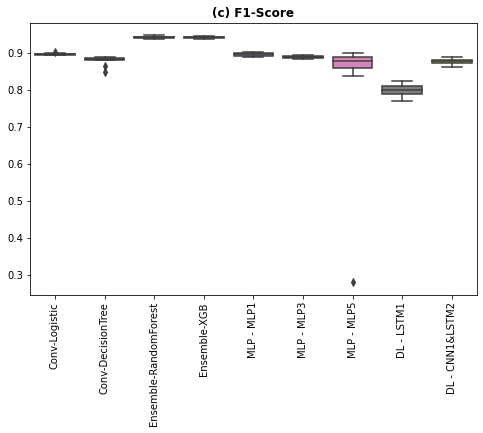

In [262]:
plt.figure(figsize=(8, 5))
plt.title("(c) F1-Score", fontweight='bold')
sns.boxplot(data=df_f1_score_kfold)
plt.xticks(rotation=90)
plt.show()

In [263]:
df_f1_score_kfold.mean(axis=0)

Conv-Logistic            0.896238
Conv-DecisionTree        0.878597
Ensemble-RandomForest    0.941603
Ensemble-XGB             0.940552
MLP - MLP1               0.895363
MLP - MLP3               0.888669
MLP - MLP5               0.815988
DL - LSTM1               0.798105
DL - CNN1&LSTM2          0.876445
dtype: float64

In [264]:
stats.friedmanchisquare(df_f1_score_kfold['Conv-Logistic'], df_f1_score_kfold['Ensemble-RandomForest'], 
                        df_f1_score_kfold['Ensemble-XGB'])

FriedmanchisquareResult(statistic=15.200000000000017, pvalue=0.0005004514334406062)

##### Conclusion:

* Random Forests and XGBoost models are the best models with F1-Score values of 0.941603 and 0.940552, respectively.

### 6.4 Evaluating the Performance using Precision

In [265]:
df_precision_kfold

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,0.892588,0.887915,0.943232,0.944121,0.894686,0.884775,0.217871,0.793551,0.869937
1,0.897207,0.888635,0.938317,0.941791,0.893924,0.887727,0.875763,0.804645,0.887776
2,0.896499,0.888961,0.942484,0.941825,0.888775,0.883305,0.859707,0.797007,0.879400
3,0.897279,0.887062,0.941717,0.939889,0.899920,0.892492,0.887867,0.823599,0.877721
4,0.896328,0.893488,0.939121,0.936459,0.900791,0.891454,0.849438,0.813013,0.884401
5,0.895715,0.863976,0.944758,0.942030,0.889904,0.899446,0.868787,0.814062,0.883779
6,0.902742,0.854417,0.948741,0.939402,0.903508,0.892190,0.899312,0.826204,0.880459
7,0.895010,0.887126,0.945508,0.942281,0.892617,0.891575,0.883226,0.790000,0.873585
8,0.893744,0.883145,0.939859,0.942212,0.899275,0.889359,0.887062,0.821640,0.880094
9,0.900383,0.886522,0.942640,0.936314,0.897090,0.883674,0.894942,0.815784,0.888102


In [266]:
df_precision = ranking_model(df_precision_kfold)
df_precision

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,4.0,5.0,2.0,1.0,3.0,6.0,9.0,8.0,7.0
1,3.0,5.0,2.0,1.0,4.0,7.0,8.0,9.0,6.0
2,3.0,4.0,1.0,2.0,5.0,6.0,8.0,9.0,7.0
3,4.0,7.0,1.0,2.0,3.0,5.0,6.0,9.0,8.0
4,4.0,5.0,1.0,2.0,3.0,6.0,8.0,9.0,7.0
5,4.0,8.0,1.0,2.0,5.0,3.0,7.0,9.0,6.0
6,4.0,8.0,1.0,2.0,3.0,6.0,5.0,9.0,7.0
7,3.0,6.0,1.0,2.0,4.0,5.0,7.0,9.0,8.0
8,4.0,7.0,2.0,1.0,3.0,5.0,6.0,9.0,8.0
9,3.0,7.0,1.0,2.0,4.0,8.0,5.0,9.0,6.0


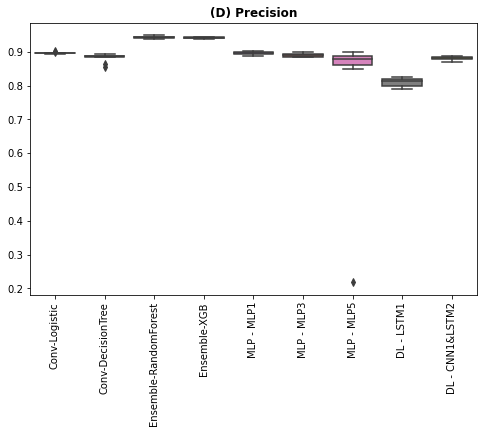

In [267]:
plt.figure(figsize=(8, 5))
plt.title("(D) Precision", fontweight='bold')
sns.boxplot(data=df_precision_kfold)
plt.xticks(rotation=90)
plt.show()

In [268]:
df_precision_kfold.mean(axis=0)

Conv-Logistic            0.896749
Conv-DecisionTree        0.882125
Ensemble-RandomForest    0.942638
Ensemble-XGB             0.940632
MLP - MLP1               0.896049
MLP - MLP3               0.889600
MLP - MLP5               0.812398
DL - LSTM1               0.809950
DL - CNN1&LSTM2          0.880525
dtype: float64

In [270]:
stats.friedmanchisquare(df_precision_kfold['Conv-Logistic'], df_precision_kfold['Ensemble-RandomForest'], 
                        df_precision_kfold['Ensemble-XGB'])

FriedmanchisquareResult(statistic=15.800000000000011, pvalue=0.0003707435404590862)

##### Conclusion:

* Random Forests and XGBoost models are the best models with precision values of 0.942638 and 0.940632, respectively.

### 6.5 Comparing the Models using Recall

In [271]:
df_recall_kfold

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,0.892446,0.886161,0.942490,0.944132,0.894348,0.884777,0.390008,0.792538,0.862466
1,0.897525,0.885661,0.938563,0.941729,0.894217,0.887912,0.873997,0.790650,0.887810
2,0.896095,0.886261,0.941963,0.941794,0.888708,0.883188,0.854692,0.796673,0.872945
3,0.897114,0.886328,0.941048,0.939884,0.899811,0.892485,0.887861,0.823510,0.875545
4,0.895577,0.889807,0.937968,0.936418,0.898665,0.890951,0.837730,0.810038,0.879021
5,0.895120,0.862715,0.943257,0.941774,0.889341,0.894219,0.867543,0.807852,0.878412
6,0.902179,0.845944,0.946523,0.939569,0.901872,0.892455,0.899505,0.780164,0.880633
7,0.893856,0.881813,0.942933,0.941417,0.891034,0.887877,0.881291,0.774675,0.865146
8,0.892905,0.879869,0.939156,0.942190,0.898307,0.889363,0.887038,0.821542,0.879771
9,0.900320,0.884351,0.942428,0.936512,0.897316,0.883345,0.892819,0.804319,0.886537


In [272]:
df_recall = ranking_model(df_recall_kfold)
df_recall

,Conv-Logistic,Conv-DecisionTree,Ensemble-RandomForest,Ensemble-XGB,MLP - MLP1,MLP - MLP3,MLP - MLP5,DL - LSTM1,DL - CNN1&LSTM2
0,4.0,5.0,2.0,1.0,3.0,6.0,9.0,8.0,7.0
1,3.0,7.0,2.0,1.0,4.0,5.0,8.0,9.0,6.0
2,3.0,5.0,1.0,2.0,4.0,6.0,8.0,9.0,7.0
3,4.0,7.0,1.0,2.0,3.0,5.0,6.0,9.0,8.0
4,4.0,6.0,1.0,2.0,3.0,5.0,8.0,9.0,7.0
5,3.0,8.0,1.0,2.0,5.0,4.0,7.0,9.0,6.0
6,3.0,8.0,1.0,2.0,4.0,6.0,5.0,9.0,7.0
7,3.0,6.0,1.0,2.0,4.0,5.0,7.0,9.0,8.0
8,4.0,7.0,2.0,1.0,3.0,5.0,6.0,9.0,8.0
9,3.0,7.0,1.0,2.0,4.0,8.0,5.0,9.0,6.0


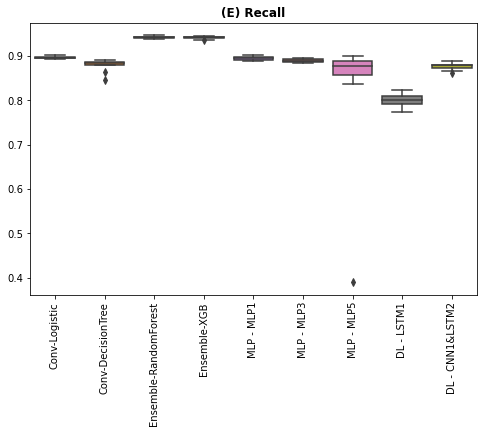

In [273]:
plt.figure(figsize=(8, 5))
plt.title("(E) Recall", fontweight='bold')
sns.boxplot(data=df_recall_kfold)
plt.xticks(rotation=90)
plt.show()

In [274]:
df_recall_kfold.mean(axis=0)

Conv-Logistic            0.896314
Conv-DecisionTree        0.878891
Ensemble-RandomForest    0.941633
Ensemble-XGB             0.940542
MLP - MLP1               0.895362
MLP - MLP3               0.888657
MLP - MLP5               0.827248
DL - LSTM1               0.800196
DL - CNN1&LSTM2          0.876829
dtype: float64

In [276]:
stats.friedmanchisquare(df_recall_kfold['Conv-Logistic'], df_recall_kfold['Ensemble-RandomForest'], 
                        df_recall_kfold['Ensemble-XGB'])

FriedmanchisquareResult(statistic=15.800000000000011, pvalue=0.0003707435404590862)

##### Conclusion:

* Random Forests and XGBoost models are the best models with Recall values of 0.941633 and 0.940542, respectively

### 6.6 Summary on Performance Evaluating 

In [277]:
df_scores = pd.DataFrame()
avg_auc = []
avg_accuracy = []
avg_f1_score = []
avg_precision = []
avg_recall = []



for col in df_recall_kfold.columns:
    avg_auc.append(df_acc_kfold[col].mean())
    avg_accuracy.append(df_accuracy_kfold[col].mean())
    avg_f1_score.append(df_f1_score_kfold[col].mean())
    avg_precision.append(df_precision_kfold[col].mean())
    avg_recall.append(df_recall_kfold[col].mean())

df_scores['Accuracy'] = avg_accuracy
df_scores['Recall'] = avg_recall
df_scores['Precision'] = avg_precision
df_scores['AUC'] = avg_auc
df_scores['F1 Score'] = avg_f1_score


df_scores.index = df_recall_kfold.columns
df_scores

,Accuracy,Recall,Precision,AUC,F1 Score
Conv-Logistic,0.896293,0.896314,0.896749,0.896314,0.896238
Conv-DecisionTree,0.878912,0.878891,0.882125,0.878891,0.878597
Ensemble-RandomForest,0.941652,0.941633,0.942638,0.941633,0.941603
Ensemble-XGB,0.940573,0.940542,0.940632,0.940542,0.940552
MLP - MLP1,0.895445,0.895362,0.896049,0.895362,0.895363
MLP - MLP3,0.888777,0.888657,0.889600,0.888657,0.888669
MLP - MLP5,0.827121,0.827248,0.812398,0.827248,0.815988
DL - LSTM1,0.799754,0.800196,0.809950,0.800196,0.798105
DL - CNN1&LSTM2,0.876792,0.876829,0.880525,0.876829,0.876445


##### Conclusion:

* Random Forests and XGBoost models are the best models 

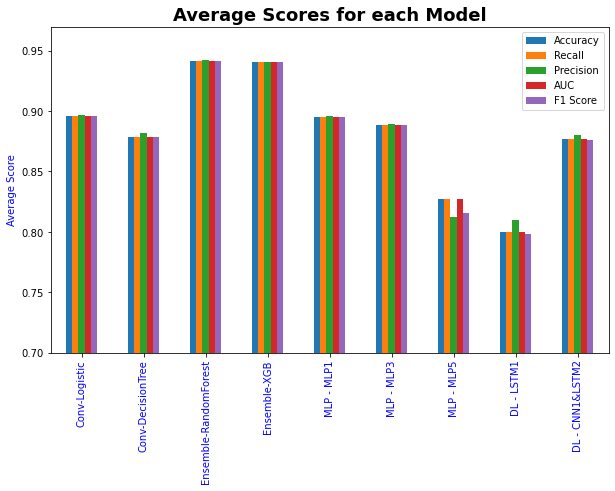

In [170]:
#plt.figure(figsize=(10, 6))
df_scores.plot(kind='bar', figsize=(10, 6))
plt.title("Average Scores for each Model", fontweight= 'bold', fontsize=18)
plt.ylim([0.7, 0.97])
plt.ylabel("Average Score", color='blue')
plt.xticks(color='blue')
plt.show()